# Demo of PyMC models

In [1]:
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import pymc as pm

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
export_images = False

## Synthetic Control

In [5]:
from causal_impact.simulate_data import generate_synthetic_control_data

treatment_time = 70
data, weightings_true = generate_synthetic_control_data(treatment_time=treatment_time)
data.head()

,a,b,c,d,e,f,g,counterfactual,causal effect,actual
0,-1.547630,-0.356079,2.222245,-0.889906,-0.943488,-2.840851,-1.850390,-1.291628,-0.0,-0.977824
1,-1.621882,0.086893,2.551235,0.089791,-0.738644,-1.163315,-1.974183,-1.251720,-0.0,-1.124841
2,-2.273188,0.587222,2.735188,0.088527,-1.499170,-0.933940,-2.125084,-1.203322,-0.0,-0.986514
3,-2.382508,-0.057475,2.888475,0.224302,-0.800568,0.002328,-2.104399,-1.148307,-0.0,-1.407724
4,-2.346798,0.494940,3.472818,0.767483,-0.450513,0.812528,-1.898813,-1.088618,-0.0,-1.016680


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.6449, but should be close to 0.8. Try to increase the number of tuning steps.


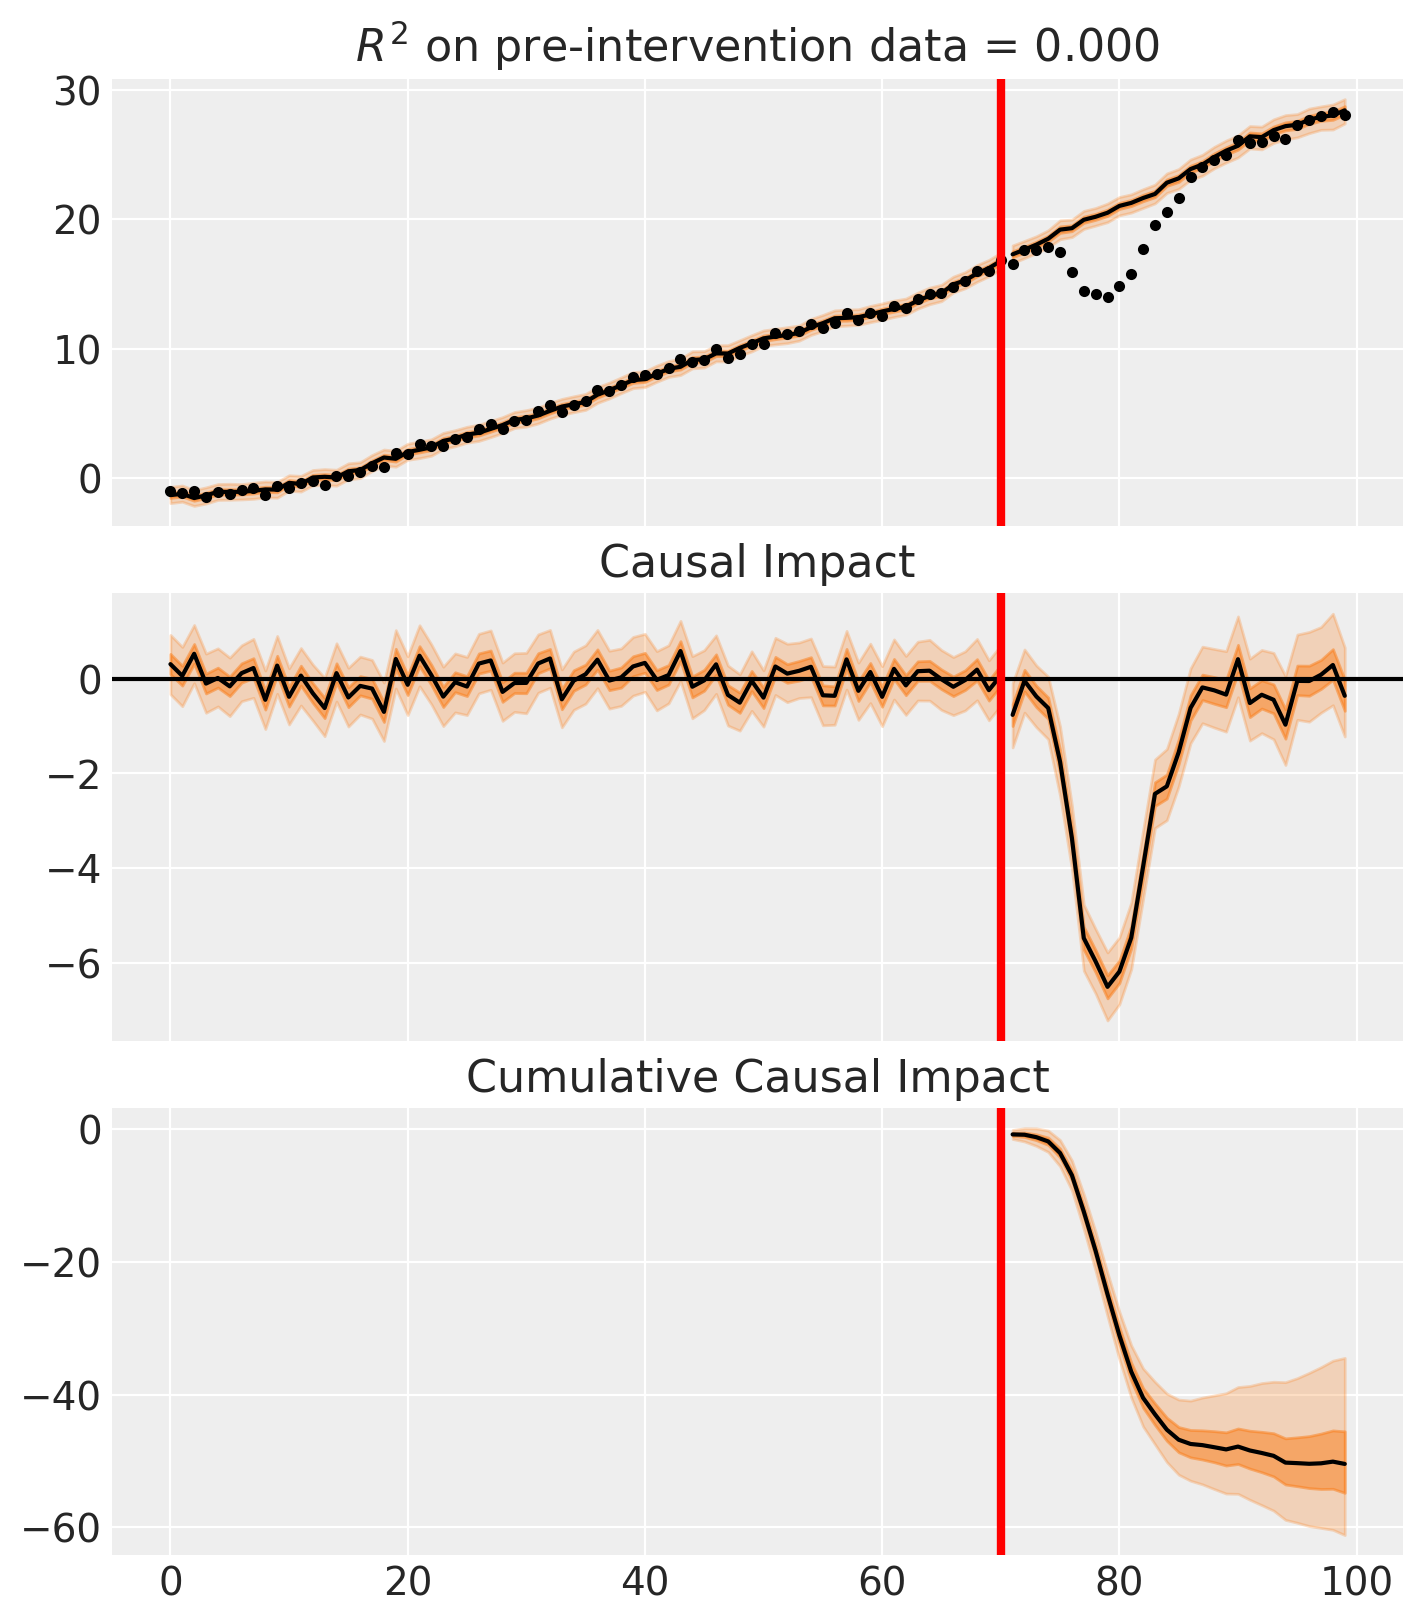

In [6]:
from causal_impact.pymc_experiments import SyntheticControl
from causal_impact.pymc_models import WeightedSumFitter

# Note, we do not want an intercept in this model
thing = SyntheticControl(data,
                         treatment_time,
                         formula = "actual ~ 0 + a + b + c + d + e + f + g",
                         prediction_model=WeightedSumFitter())

thing.plot();

if export_images:
    plt.savefig('../img/synthetic_control_pymc.png', bbox_inches='tight', dpi=300, facecolor="white")